In [1]:
import urllib.request
import zipfile
import os
import ssl

try:
    os.mkdir("files")
except:
    pass

ssl._create_default_https_context = ssl._create_unverified_context

with urllib.request.urlopen('https://courses.cs.tau.ac.il/pyProg/2526a/resources/notebook_resources.zip') as f:
    content = f.read()

with open('files/notebook_resources.zip', 'wb') as f:
    f.write(content)

with zipfile.ZipFile('files/notebook_resources.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

print(os.listdir('files'))

['baby.png', 'countries-of-the-world.csv', 'dialation.png', 'dialation_2.png', 'dog.png', 'dog_noised.png', 'erosion.png', 'erosion_2.png', 'evil_morty_1.png', 'evil_morty_change.png', 'evil_morty_change_3.png', 'evil_morty_change_noised.png', 'evil_morty_segmentation.png', 'ex1.csv', 'ex2.csv', 'foods.txt', 'infile1.txt', 'infile2.txt', 'koala.png', 'monday.txt', 'notebook_resources.zip', 'orders_2_2024.csv', 'orders_3_2024.csv', 'orders_4_2024.csv', 'out.txt', 'products2.csv', 'ship.png', 'StudentsGrades.csv', 'sunday.txt', 'witcher_1.csv', 'witcher_2.csv', 'woman_noised.png', '__MACOSX']


**שימו לב**: על מנת להריץ את התאים ב-Live Code, יש לייבא תחילה את ספרית `pandas` ע"י הרצת השורת הראשונה בתא למטה.   
בנוסף, נגביל את הדפסת הטבלאות לחמש שורות לכל היותר ע"י שורת הקוד השניה.

In [3]:
import pandas as pd
pd.options.display.max_rows=5

# יצירת טבלה חדשה

```{admonition} **הערה**
:class: info

במהלך כל נושא זה, נדפיס את הטבלאות באמצעות הפקודה `display` המציגה גרסה מעוצבת של הטבלה. פקודה זו זמינה רק במחברות jupyter.

כדי להדפיס טבלה בעורך הקוד שלכם, השתמשו בפקודה `print`.
```

כפי שציינו ביחידה הקודמת, הטיפוס `DataFrame` הוא מעין "הכלאה" בין רשימות ומילונים. לכן, קיימות מספר דרכים להעביר קלט המורכב מרשימות ומילונים על מנת לאתחל אובייקט `DataFrame` חדש. נדגים פה ארבע דרכים:

## 1. מילון של רשימות    
במקרה זה, כל זוג מפתח–ערך במילון משמש לבניית עמודה אחת ב־`DataFrame`: המפתח הוא שם העמודה, והערך הוא רשימה של כל התאים בעמודה זו לפי סדרם.

In [4]:
data = {'Name': ['Rick', 'Morty'], 'Age': [70, 14]}
df = pd.DataFrame(data)
display(df)

Name  Age
0   Rick   70
1  Morty   14

```{admonition} **שימו לב**
:class: error

המספרים המודגשים בצד ימין הם **שמות השורות**, ואינן חלק מהערכים בטבלה.

בברירת מחדל, שמות השורות, הוא מאותחלות אוטומטית לפי סדרת מספרים שלמים  המתחילה מ0.

נסו לאתחל את שמות השורות בעצמכם באמצעות הפרמטר `index`
```

שימו לב כי כל הרשימות חייבות להיות באותו אורך, אחרת תתקבל שגיאה:

In [ ]:
data = {'Profession': ['Scientist', 'Kid'], 'Age': [70, 14, 17]}
df = pd.DataFrame(data)

## 2. רשימה של מילונים 
כאן כל מילון מייצג שורה בודדת, וזוג מפתח-ערך מייצג תא בודד: המפתח הוא כותרת העמודה הערך הוא מה שנמצא בתא.

In [13]:
data = [{'Name': 'Rick', 'Age': 70}, {'Name': 'Morty', 'Age': 14}]
df = pd.DataFrame(data)
display(df)

Name  Age
0   Rick   70
1  Morty   14

```{admonition} **חשבו**
:class: caution
מה יקרה אם יהיו מפתחות שיופיעו רק בחלק מהמילונים? בדקו את השערתכם.
```

In [ ]:
# Write your code here

## 3. רשימה של רשימות
כאן כל רשימה מקוננות מייצגת שורה בטבלה. בנוסף ניתן להעביר עוד 2 ארגומנטים: `index` ו`columns`, המייצגים את שמות השורות והעמודות בהתאמה.

In [14]:
ages_by_name = [['Rick', 'Morty'], [70, 14]]
df = pd.DataFrame(ages_by_name, columns=['Name', 'Age'], index=["Row 1", "Row2"])
display(df)

Name    Age
Row 1  Rick  Morty
Row2     70     14

## 4. טעינת טבלה מקובץ CSV (או **C**omma **S**eperated **V**alues) 

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/6JrS4dDPnlM" title="pandas 2" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

```{admonition}  טקסט המופיע למטה בסגול מציין קטעים המופיעים בסרטון    
:class: custom-text
ניתן להיעזר בו כדי לחזור על התכנים או לעיין בהם שוב.
```


<span class=custom-text-content> 

קובץ CSV הוא קובץ טקסט פשוט שבו הנתונים נשמרים בצורה טבלאית, כך שכל שורה מייצגת רשומה חדשה וכל ערך בתוך השורה מופרד באמצעות פסיק.   
במילים אחרות, מדובר בפורמט שבו פסיקים משמשים בתור "מפרידי עמודות", ושורות חדשות מופרדות באמצעות מעבר שורה (`\n`).   
לדוגמא, אם נרצה לשמור ציונים של סטודנטים, נכתוב תחילה את שמות העמודות (כותרות), ולאחר מכן כל שורה תכלול את שם הסטודנט ואת ציוניו.   

</span>

```python
        
        Name,Programming,Marine Biology,Stellar Cartography    
        Yael,50,56,70    
        Nadav,61,77,75    
```

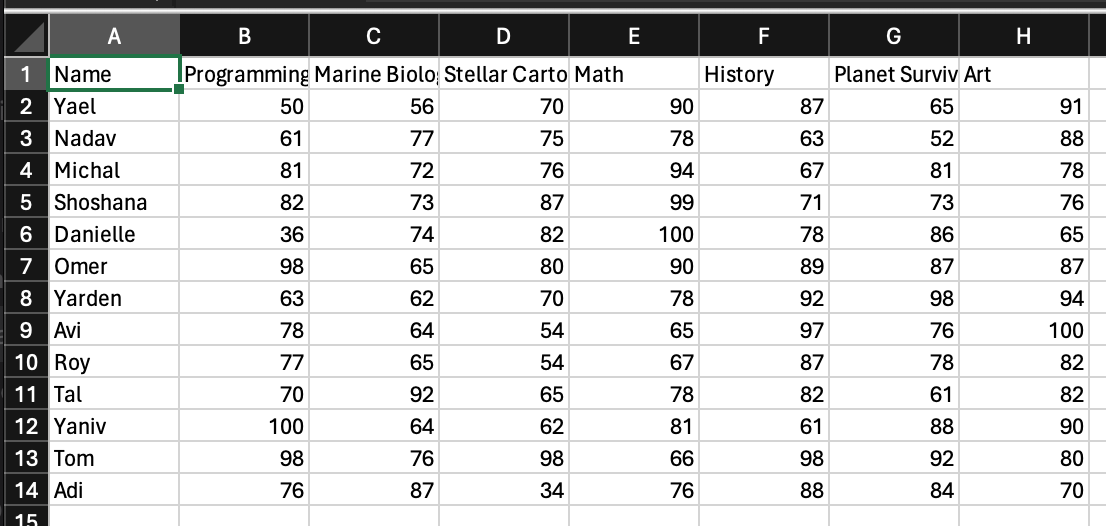


<span class=custom-text-content> 

היתרון המרכזי של CSV הוא הפשטות והנגישות שלו: מדובר בקובץ טקסט קריא שניתן לפתוח בעורך טקסט רגיל, לטעון בקלות לתוך תוכנות כמו Excel, או לעבד באמצעות שפות תכנות כמו פייתון. בזכות הפורמט הישיר והסטנדרטי, CSV הוא אחד הכלים הנפוצים ביותר להעברת נתונים בין מערכות שונות.

</span>

לדוגמא, תוכן הקובץ הבא:
        
        Name,Programming,Marine Biology,Stellar Cartography    
        Yael,50,56,70    
        Nadav,61,77,75    

מייצג את הטבלה הבאה: 


<table align=left><tr><td>Name</td><td>Programming</td><td>Marine Biology</td><td>Stellar Cartography</td></tr>
       <tr><td>Yael</td><td>50</td><td>56</td><td>70</td></tr>
       <tr><td>Nadav</td><td>61</td><td>77</td><td>75</td></tr>
</table>

</br>
</br>
</br>
</br>
</br>
</br>

<table>
    <tr><td>כך יראה תוכן הקובץ בעורך טקסט פשוט:
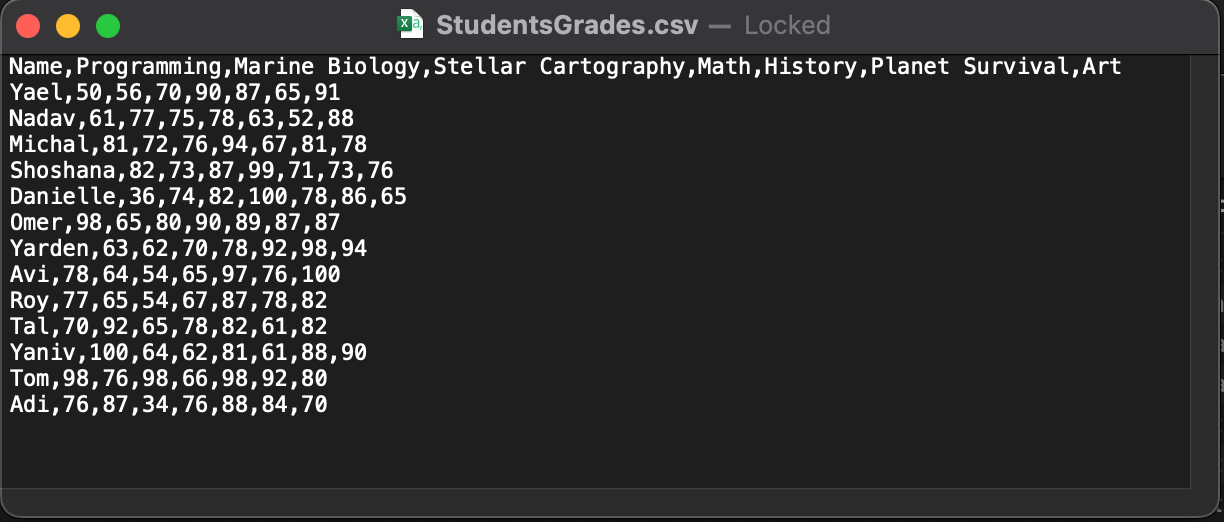
        </td>
    <td>כך יראה הקובץ באקסל:    
       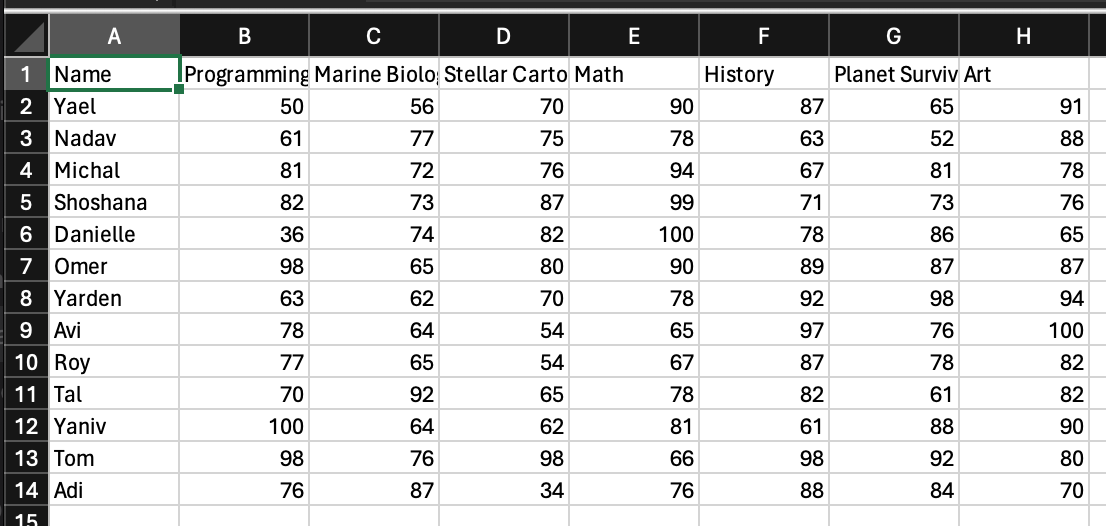
        </td>
    </tr>
</table>

<span class=custom-text-content> 

כדי לטעון קובץ CSV מנתיב מסוים (לדוגמא, `files/StudentsGrades.csv`) למשתנה מטיפוס `DataFrame`, נשתמש בפונקציה `read_csv` של `pandas`:

</span>

In [27]:
inputFileName = "files/StudentsGrades.csv"
df = pd.read_csv(inputFileName)
display(df)

Name  Programming  Marine Biology  Stellar Cartography  Math  History  \
0    Yael           50              56                   70    60       87   
1   Nadav           61              77                   75    75       63   
..    ...          ...             ...                  ...   ...      ...   
11    Tom           98              76                   98   100       98   
12    Adi           76              87                   34    90       88   

    Planet Survival  Art  
0                65   91  
1                52   88  
..              ...  ...  
11               92   80  
12               84   70  

[13 rows x 8 columns]